# **2.2 파이토치 기초 문법**

## **2.2.1 텐서 다루기**

In [1]:
import torch
print(torch.tensor([[1,2], [3,4]]))
print(torch.tensor([[1,2],[3,4]], device="cpu"))
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64))

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [ ]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

temp = torch.tensor([[1,2],[3,4]], device="cpu")
print(temp.to("cpu").numpy())

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [ ]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])
print(temp[0], temp[1], temp[-1])
print('--------------------------')
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
--------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [ ]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print( w - v)

tensor([2, 2, 3])


In [ ]:
temp = torch.tensor([
    [1,2], [3,4]])

print(temp.shape)
print('------------------------------')
print(temp.view(4,1))
print('------------------------------')
print(temp.view(-1))
print('------------------------------')
print(temp.view(1,-1))
print('------------------------------')
print(temp.view(-1,1))

torch.Size([2, 2])
------------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------------
tensor([1, 2, 3, 4])
------------------------------
tensor([[1, 2, 3, 4]])
------------------------------
tensor([[1],
        [2],
        [3],
        [4]])


## **2.2.2 데이터 준비**

In [37]:
import pandas as pd
import torch
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/car_evaluation.csv")

x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

KeyError: 'x'

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self, csv_file):
        self.label = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
        label = torch.tensor(self.label.iloc[idx, 3]).int()
        return sample, label

tensor_dataset = CustomDataset('../covtype.csv')
dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)

In [ ]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])
from torchvision.datasets import MNIST
import requests
download_root = '../chap02/data/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

## **2.2.3 모델 정의**

nn.Module()을 상속하여 정의하는 방법

In [ ]:
class MLP(Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer = Linear(inputs, 1)
        self.activation = Sigmoid()

    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X

NameError: name 'MOdule' is not defined

Sequential 신경망을 정의하는 방법

In [ ]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True),)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

model = MLP()

print("Printing children\n---------------------------------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n------------------------------------------")
print(list(model.modules()))


함수로 신경망을 정의하는 방법

In [ ]:
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_feature=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net = nn.Sequential(hidden, activation, output)
    return net

## **2.2.4 모델의 파라미터 정의**

In [ ]:
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.LamdaLR(optimizer=optimizer, lr_lambda=lamda epoch: 0.95 ** epoch)

for epoch in range(1, 100+1):
    for x, y in dataloader:
        optimizer.zero_grad()
    loss_fn(model(x), y).backward()
    optimizer.step()
    scheduler.step()

## **2.2.5 모델 훈련**

In [ ]:
for epoch in range(100):
    yhat = model(x_train)
    loss = criterion(yhat, y_train)
    optimizer.zero_grad()
    loss.backward
    optimizer.step()

## **2.2.6 모델 평가**

함수를 이용하여 모델을 평가하는 코드드

In [ ]:
import torch
import torchmetrics

pred = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)

모듈을 이용하여 모델을 평가하는 코드드

In [ ]:
import torch
import torchmetrics
metric = torchmetrics.Accuracy()

n_batches = 10
for i in range(n_batches):
    preds = torch.radn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}")

acc = metric.compute()
print(f"Accuracy on all data: {acc}")

## **2.2.7 훈련 과정 모니터링**

In [ ]:
import torch
import torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("../chap02/tensorboard")

for epoch in range(num_epochs):
    model.train()
    batch_loss = 0.0

    for i, (x,y) in enumerate(DataLoader):
        x, y = x.to(device).float(), y.to(device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add_scalar("Loss", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

writer.close()

# **2.4 파이토치 코드 맛보기기**

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/car_evaluation.csv")
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

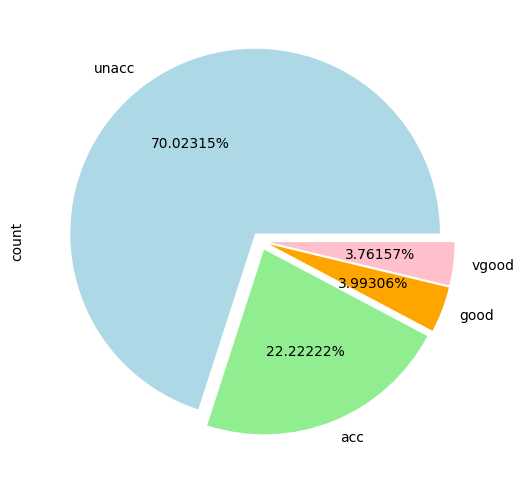

In [14]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [15]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [16]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [17]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [18]:
categorical_column_size = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_size = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_size]
print(categorical_embedding_size)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [19]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [27]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.all_embedding_dropout = nn.Dropout(p)

        all_layers =[]
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))

        x = torch.cat(embeddings, 1)
        x = self.all_embedding_dropout(x)
        x=self.layers(x)
        return x

In [28]:
model  = Model(categorical_embedding_size, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (all_embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [29]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [30]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [31]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device, dtype=torch.int64)

for i in range(epochs):
    i+=1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

        optimizer.zero_grad()
        single_loss.backward()
        optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.72104824
epoch:  26 loss: 1.67072725
epoch:  51 loss: 1.66544390
epoch:  76 loss: 1.65329230
epoch: 101 loss: 1.63485348
epoch: 126 loss: 1.58632457
epoch: 151 loss: 1.56217909
epoch: 176 loss: 1.58280957
epoch: 201 loss: 1.59268463
epoch: 226 loss: 1.56594157
epoch: 251 loss: 1.57733321
epoch: 276 loss: 1.58936286
epoch: 301 loss: 1.54527700
epoch: 326 loss: 1.54691184
epoch: 351 loss: 1.53359878
epoch: 376 loss: 1.53976548
epoch: 401 loss: 1.52630651
epoch: 426 loss: 1.51247644
epoch: 451 loss: 1.52109528
epoch: 476 loss: 1.53056169
epoch: 500 loss: 1.5140511990


In [32]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)

print(f'Loss: {loss:.8f}')

Loss: 1.48032260


In [33]:
print(y_val[:5])

tensor([[ 0.8085, -0.9383,  1.6480, -0.7243],
        [-1.1433, -0.7354, -1.5632, -1.2010],
        [-0.8644,  0.0905, -0.5038, -0.3350],
        [ 0.3222,  0.2056,  0.2585,  0.2589],
        [-0.0466, -1.0620, -0.5632, -0.0184]])


In [34]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([2, 1, 1, 0, 3])


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[71 52 72 64]
 [20 18 24 24]
 [ 0  0  0  0]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           0       0.78      0.27      0.41       259
           1       0.26      0.21      0.23        86
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.26       345
   macro avg       0.26      0.12      0.16       345
weighted avg       0.65      0.26      0.36       345

0.2579710144927536


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
